In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima

In [10]:
df = pd.read_csv("dataset/city_month_birth.csv", index_col="Month")
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
cities = df.columns

In [55]:
df.head(8)

,Adana,Adıyaman,Afyonkarahisar,Aksaray,Amasya,Ankara,Antalya,Ardahan,Artvin,Aydın,...,Yalova,Yozgat,Zonguldak,Çanakkale,Çankırı,Çorum,İstanbul,İzmir,Şanlıurfa,Şırnak
Month,,,,,,,,,,,,,,,,,,,,,
2009-01-01,3886,1362,1089,629,421,6328,3450,223,189,1446,...,271,749,807,545,253,654,18682,5052,5901,1386
2009-02-01,2847,978,954,541,320,4955,2410,133,145,997,...,194,628,621,382,188,573,15617,3948,3759,934
2009-03-01,2832,958,981,616,375,5502,2493,161,150,1049,...,234,687,767,445,206,614,17000,4067,3882,923
2009-04-01,2545,1066,1067,601,379,6039,2299,199,178,1056,...,233,762,754,445,196,685,16824,3935,4354,1159
2009-05-01,2534,1091,1053,695,381,6076,2306,156,164,1067,...,268,798,738,437,227,651,17268,4215,4071,1074
2009-06-01,2878,1150,989,717,396,6189,2366,152,166,1052,...,228,792,789,467,236,712,17835,4258,4364,1191
2009-07-01,3589,1267,1088,717,422,6646,2849,164,211,1155,...,230,776,818,457,255,705,19607,4820,4799,1208
2009-08-01,3745,1222,1015,739,373,6336,2740,172,198,1193,...,259,770,795,475,241,811,18908,4548,4897,1219


<Axes: xlabel='Month'>

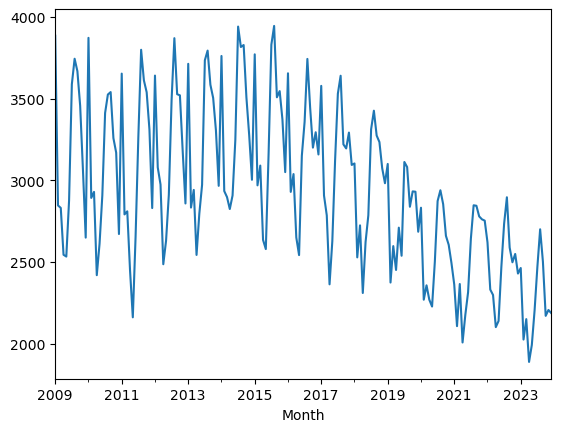

In [12]:
df["Adana"].plot()

In [64]:
def sarima_auto(df):
    model = auto_arima(df,
                       seasonal=True, m=12,               
                       start_p=0, start_q=0, max_p=5, max_q=5,           
                       start_P=0, start_Q=0, max_P=2, max_Q=2,             
                       d=None, D=None,      
                       maxiter=120,        
                       suppress_warnings=True, 
                       stepwise=True)
    return model       

In [77]:
model_dict = {}
for city in cities:
    model_dict[city] = (sarima_auto(df[city]), sarima_auto(df[city]).predict(n_periods=36).astype(int))

c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,3)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "c:\Users\siren\anaconda3\envs\tubitak\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 703, in fit
  

In [78]:
import pickle
with open('filename.pickle', 'wb') as handle:
    pickle.dump(model_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle
with open('forecast_dict.pickle', "rb") as handle:
    model_dict = pickle.load(handle)

In [7]:
model_dict

{'Adana': (ARIMA(maxiter=120, order=(0, 1, 3), scoring_args={},
        seasonal_order=(1, 0, 1, 12), suppress_warnings=True,
        with_intercept=False),
  2024-01-01    2227
  2024-02-01    1869
  2024-03-01    1967
  2024-04-01    1732
  2024-05-01    1820
  2024-06-01    2038
  2024-07-01    2311
  2024-08-01    2496
  2024-09-01    2307
  2024-10-01    2097
  2024-11-01    2122
  2024-12-01    2070
  2025-01-01    2085
  2025-02-01    1729
  2025-03-01    1822
  2025-04-01    1594
  2025-05-01    1680
  2025-06-01    1891
  2025-07-01    2157
  2025-08-01    2337
  2025-09-01    2153
  2025-10-01    1949
  2025-11-01    1974
  2025-12-01    1923
  2026-01-01    1937
  2026-02-01    1591
  2026-03-01    1682
  2026-04-01    1460
  2026-05-01    1544
  2026-06-01    1749
  2026-07-01    2007
  2026-08-01    2182
  2026-09-01    2003
  2026-10-01    1806
  2026-11-01    1829
  2026-12-01    1780
  Freq: MS, dtype: int32),
 'Adıyaman': (ARIMA(maxiter=120, order=(0, 1, 1), scoring_ar

In [11]:
lst_predict = []
for city in cities:
    lst_predict.append(model_dict[city][1].to_frame(name = city))

In [12]:
cities_predict = pd.concat(lst_predict, axis=1)

In [13]:
cities_predict

,Adana,Adıyaman,Afyonkarahisar,Aksaray,Amasya,Ankara,Antalya,Ardahan,Artvin,Aydın,...,Yalova,Yozgat,Zonguldak,Çanakkale,Çankırı,Çorum,İstanbul,İzmir,Şanlıurfa,Şırnak
2024-01-01,2227,691,647,451,217,4264,2113,76,113,862,...,236,306,311,368,154,330,12493,3051,4613,1003
2024-02-01,1869,521,567,386,189,3841,1845,61,95,762,...,205,287,272,348,125,303,11092,2725,3898,869
2024-03-01,1967,592,650,432,223,4226,1919,78,106,827,...,221,312,310,382,146,347,11792,2884,4203,970
2024-04-01,1732,504,661,433,224,4186,1783,71,107,764,...,213,327,289,345,146,344,11163,2775,3848,909
2024-05-01,1820,590,695,496,236,4379,1932,86,108,828,...,233,320,313,380,159,363,11755,2951,3708,923
2024-06-01,2038,639,696,498,240,4607,2075,80,120,914,...,234,316,338,410,166,379,12647,3227,3833,979
2024-07-01,2311,679,755,524,261,4913,2251,86,128,980,...,248,326,375,439,177,400,13687,3420,4434,1074
2024-08-01,2496,706,719,491,241,4663,2345,79,127,992,...,242,336,379,417,169,386,13498,3365,4456,1097
2024-09-01,2307,599,630,461,223,4320,2145,77,121,884,...,234,315,323,383,149,366,12629,3195,4448,1016
2024-10-01,2097,524,613,439,225,4229,2109,69,112,882,...,217,286,315,381,145,338,12151,2967,4246,1003


In [14]:
all_df = pd.concat([df, cities_predict])

In [16]:
all_df.to_csv("dataset/full_montly_df.csv", )

In [117]:
year_birth_df = all_df.resample("Y").sum()

In [119]:
year_birth_df.to_csv("dataset/predict_yearly.csv")

In [129]:
year_birth_df.index = year_birth_df.index.year

In [181]:
# Td için ayrı yap
asi_dict

{'Hepatit B': [(0, 3)],
 'BCG': [(0, 1)],
 'DaBT-IPA-Hib': [(0, 3), (1, 1)],
 'KPA': [(0, 3)],
 'KKK': [(0, 2), (3, 1)],
 'DaBT-IPA': [(3, 1)],
 'OPA': [(0, 1), (1, 1)],
 'Hepatit A': [(1, 2)],
 'Suçiçeği': [(0, 1)]}

In [195]:
asi_cities_dict = {}
asi_year = {}
years = range(2013,2027)

for city in cities:
    for year in years:
        asi_year[year] = {}
        for asi in asi_dict.keys():
            patterns = asi_dict[asi]
            total = 0
            for pattern in patterns:
                total += pattern[1] * (year_birth_df.loc[year - pattern[0], city])
            asi_year[year].update({asi: total})
    asi_cities_dict[city] = asi_year

In [196]:
asi_cities_dict

{'Adana': {2013: {'Hepatit B': 43245,
   'BCG': 14415,
   'DaBT-IPA-Hib': 57264,
   'KPA': 43245,
   'KKK': 42463,
   'DaBT-IPA': 13633,
   'OPA': 28434,
   'Hepatit A': 28038,
   'Suçiçeği': 14415},
  2014: {'Hepatit B': 45432,
   'BCG': 15144,
   'DaBT-IPA-Hib': 59847,
   'KPA': 45432,
   'KKK': 43889,
   'DaBT-IPA': 13601,
   'OPA': 29559,
   'Hepatit A': 28830,
   'Suçiçeği': 15144},
  2015: {'Hepatit B': 44373,
   'BCG': 14791,
   'DaBT-IPA-Hib': 59517,
   'KPA': 44373,
   'KKK': 43601,
   'DaBT-IPA': 14019,
   'OPA': 29935,
   'Hepatit A': 30288,
   'Suçiçeği': 14791},
  2016: {'Hepatit B': 38358,
   'BCG': 12786,
   'DaBT-IPA-Hib': 53149,
   'KPA': 38358,
   'KKK': 39987,
   'DaBT-IPA': 14415,
   'OPA': 27577,
   'Hepatit A': 29582,
   'Suçiçeği': 12786},
  2017: {'Hepatit B': 41820,
   'BCG': 13940,
   'DaBT-IPA-Hib': 54606,
   'KPA': 41820,
   'KKK': 43024,
   'DaBT-IPA': 15144,
   'OPA': 26726,
   'Hepatit A': 25572,
   'Suçiçeği': 13940},
  2018: {'Hepatit B': 42306,
   'BCG

In [189]:
year_birth_df

,Adana,Adıyaman,Afyonkarahisar,Aksaray,Amasya,Ankara,Antalya,Ardahan,Artvin,Aydın,...,Yalova,Yozgat,Zonguldak,Çanakkale,Çankırı,Çorum,İstanbul,İzmir,Şanlıurfa,Şırnak
2009,37699,13415,11827,7616,4351,68342,30647,1907,2057,12971,...,2817,8591,8839,5217,2532,7972,210441,50838,54420,13862
2010,37219,13532,11423,7387,4197,68271,30674,1766,2006,12803,...,2600,7748,8319,4981,2462,7636,213821,50303,56007,13633
2011,36886,13404,11160,7262,4041,69262,30957,1751,1937,12632,...,2564,7298,7781,5229,2356,7318,213441,50963,57166,13601
2012,38181,13415,11201,7045,4049,71596,33018,1690,2062,13544,...,2742,6957,7709,5420,2296,7489,226594,53971,59237,14019
2013,38698,13071,10910,6965,4033,72976,33210,1596,2021,13219,...,2739,6525,7323,5285,2289,7109,229390,53376,59931,14415
2014,39953,13681,11377,7071,3911,76659,34808,1634,2070,13632,...,3000,6586,7123,5489,2358,7278,242397,55906,63395,15144
2015,39467,13413,11184,6862,3959,77368,35907,1540,1987,13820,...,3013,6290,6753,5370,2170,6662,242888,55946,62745,14791
2016,38173,12958,10776,6755,3736,76388,35580,1407,1997,13702,...,3276,5940,6379,5440,2234,6644,240027,54623,63490,12786
2017,37365,13056,10517,6786,3804,75902,33760,1415,1917,14104,...,3261,5909,6195,5515,2186,6360,233220,53895,64747,13940
2018,35387,12566,10075,6714,3664,73270,32468,1319,1843,13425,...,3220,5482,5836,5535,2265,6164,223223,51617,63468,14102
